Analisando notas em geral

In [3]:
# Importando módulos
import pandas as pd

In [4]:
# Lendo arquivo csv
notas = pd.read_csv('data/ml-latest-small/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# Verificando as dimensões do dataset
notas.shape

(100836, 4)

In [6]:
# Alterando as colunas
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
# Trabalhando com Series
# Vendo a coluna 'nota'
notas['nota'].head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

In [8]:
# Quais os valores da minha série?
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
# Quantas vezes os valores únicos se repetem?
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [10]:
# Qual a média de todas as notas?
notas['nota'].mean()

3.501556983616962

<AxesSubplot:ylabel='Frequency'>

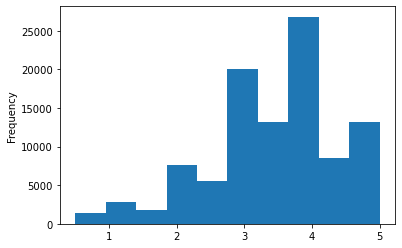

In [11]:
# Plotando os dados
notas.nota.plot(kind='hist')

In [12]:
# E a mediana?
notas.nota.median()

3.5

In [13]:
# Descrevendo, diversas medidas de descrição dos dados
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

E:\Programas\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

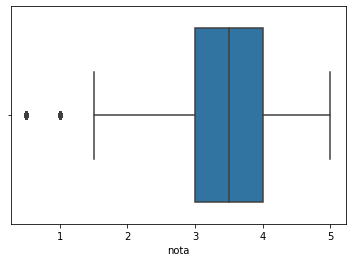

In [14]:
# Boxplot
import seaborn as sns

sns.boxplot(notas.nota)

Olhando os filmes

In [21]:
## Análise exploratória dos dados
# Trabalhando com o dataset 'movies'
filmes = pd.read_csv('data/ml-latest-small/movies.csv')

# Alterando as colunas
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Analisando algumas notas específicas por filme

In [26]:
# Filtrando pelo id de um filme
notas.query("filmeId==1") # Toy Story

# Todas as notas do filme com id = 1
notas.query("filmeId==1").nota

# A média das notas do filme com id = 1
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [27]:
# Jumanji
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [31]:
# Agrupando notas por coluna = filme
notas.groupby("filmeId")

# Tirando a média por filme
medias_por_filme = notas.groupby("filmeId").nota.mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

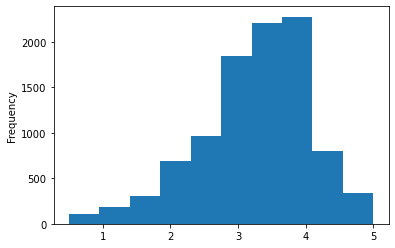

In [32]:
# Histograma de notas
medias_por_filme.plot(kind='hist')

<AxesSubplot:ylabel='nota'>

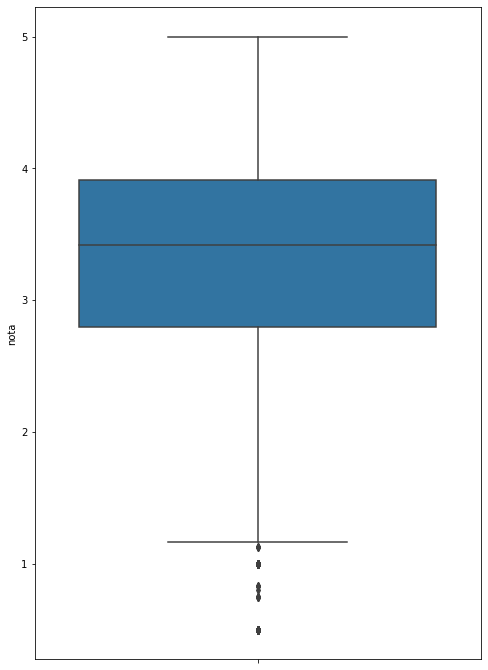

In [41]:
import matplotlib.pyplot as plt

# Configs do plot com o pyplot
plt.figure(figsize=(8,12))

# Bloxplot das notas
sns.boxplot(y=medias_por_filme)

In [34]:
# Medidas de descrição das notas
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

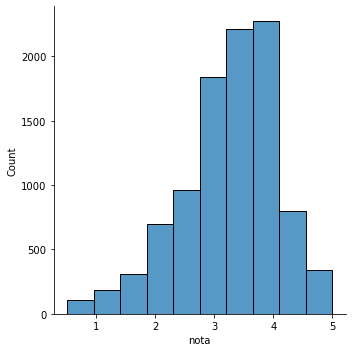

In [36]:
# Histograma pelo seaborn
sns.displot(medias_por_filme, bins=10) # 10 intervalos

Text(0.5, 1.0, 'Histograma das médias por filmes')

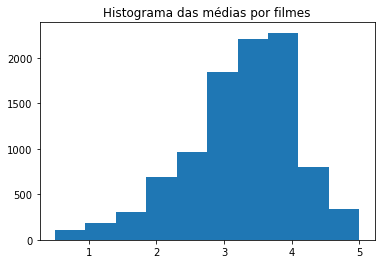

In [38]:
# Plot com matplotlib
plt.hist(medias_por_filme)

# Título
plt.title('Histograma das médias por filmes')